In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
gdp = pd.read_csv("interpolated_data/gdp.csv")
fertility_rate = pd.read_csv("interpolated_data/fertility_rate.csv")
life_expectancy = pd.read_csv("interpolated_data/life_expectancy.csv")
school_enrollment = pd.read_csv("interpolated_data/school_enrollment_secondary.csv")
school_enrollment_ter = pd.read_csv("interpolated_data/school_enrollment_tertiary.csv")
immunization = pd.read_csv("interpolated_data/immunization.csv")
electricity = pd.read_csv("interpolated_data/electricity.csv")

In [40]:
gdp.head(10)

,Unnamed: 0,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,0,0.1,62.369375,0.1,0.1,2977.838863,28400.665343,985.678053,11.692851,2566.752440,...,939.560806,7903.659557,23.688924,477.855772,456.826375,123.801284,0.1,529.561923,228.567399,276.643363
1,1,0.1,62.443703,0.1,0.1,3142.868428,28489.010430,1033.996173,13.019200,2640.526871,...,954.355361,8176.318014,25.520501,492.597967,471.686740,132.039543,0.1,543.042224,216.274674,279.332656
2,2,0.1,60.950364,0.1,0.1,3317.043806,28577.355516,1163.186836,14.495999,2716.421751,...,1006.879977,8458.382574,27.493691,507.794969,495.967407,140.826011,0.1,560.699395,208.562685,275.966139
3,3,0.1,82.021738,0.1,0.1,3500.871851,28665.700602,855.275656,16.140316,2794.498026,...,1060.570324,8750.177726,29.619445,523.460811,523.401899,150.197168,0.1,601.599951,209.453362,277.532515
4,4,0.1,85.511073,0.1,0.1,3694.887507,28754.045689,1179.504098,17.971152,2874.818395,...,874.199411,9052.039153,31.909557,539.609954,561.424407,160.191921,0.1,642.688431,236.941713,282.376856
5,5,0.1,105.243196,0.1,0.1,3899.655363,28842.390775,1285.260799,20.009664,2957.447358,...,869.906867,9364.314120,34.376735,556.257310,599.152118,170.851767,0.1,681.131112,296.022427,294.893605
6,6,0.1,143.103233,0.1,0.1,4115.771297,28930.735862,1277.968419,22.279409,3042.451269,...,877.196049,9687.361871,37.034671,573.418250,636.789953,182.220964,0.1,718.118179,334.672528,279.337779
7,7,0.1,167.165675,0.1,0.1,4343.864213,29019.080948,1065.898520,24.806617,3129.898390,...,894.683818,10021.554041,39.898113,591.108616,663.878549,194.346715,0.1,775.152812,350.653425,295.056449
8,8,0.1,134.012768,0.1,0.1,4584.597864,29107.426035,1143.810428,27.620492,3219.858945,...,940.201420,10367.275089,42.982949,609.344743,701.852920,207.279365,0.1,813.508497,398.557506,302.802871
9,9,0.1,134.250360,0.1,0.1,4838.672791,29195.771121,1331.639709,30.753552,3312.405175,...,934.047607,10724.922734,46.306299,628.143468,758.180667,221.072608,0.1,887.246703,472.640293,346.538920


In [41]:
def data_prep(data_a: pd.DataFrame, data_b: pd.DataFrame):
    # only use countries that are in both tables
    country_list = []
    data_a_keys = data_a.keys()
    data_b_keys = data_b.keys()

    for c in data_a_keys:
        if not c in data_b_keys: continue
        if c == "Unnamed: 0": continue
        country_list.append(c)

    return country_list

In [72]:
def calc_correlation(gdp: list, data: list, data_name: str, data_log: bool=False, disable_gdp_log: bool=False):
    # let's do that for all countries
    x, y = [], []

    def add_values(c):
        c_gdp = list(gdp.get(c))
        c_data = list(data.get(c))
        
        for i in range(len(c_gdp)):
            if c_gdp[i] == -1 or c_data[i] == -1: continue
            if c_gdp[i] == 0.1 or c_data[i] <= 0.1: continue
            # if c_gdp[i] > 100 or c_data[i] > 100: continue
            else:
                x.append(c_gdp[i])
                y.append(c_data[i])

    country_list = data_prep(gdp, data)
    for c in country_list:
        add_values(c)

    print(np.min(x), np.min(y))
    if not disable_gdp_log:
        x = list(np.log(np.array(x)))
    if data_log:
        y = list(np.log(np.array(y)))
    
    for i in range(len(x)):
        if x[i] < 0: x[i] = 0
        if y[i] < 0: y[i] = 0
    print(np.min(x), np.min(y))

    plt.scatter(x, y, s=2)
    plt.xlabel("GDP per capita (current US$) - logarithmic transformed")
    plt.ylabel(data_name)
    plt.show()
    
    out = f"correlation between GDP and {data_name}: {np.corrcoef(np.array(x), np.array(y))[0][1]}"

    return out

1.82789359637233 11.995
0.6031642636640457 11.995


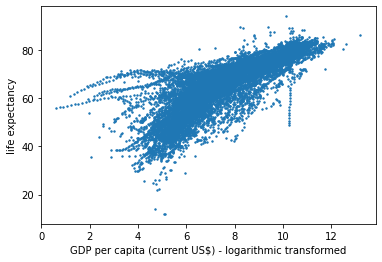

'correlation between GDP and life expectancy: 0.7871021148622347'

In [65]:
calc_correlation(gdp, life_expectancy, "life expectancy", False)

1.82789359637233 0.1867042933219789
0.6031642636640457 0.0


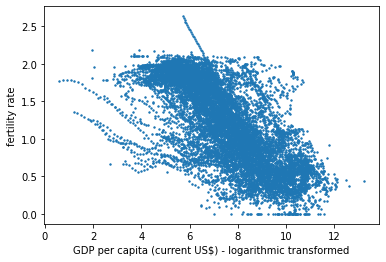

'correlation between GDP and fertility rate: -0.7083904873860163'

In [64]:
calc_correlation(gdp, fertility_rate, "fertility rate", data_log=True)

6.941079147323592 0.1483583759523696
1.9374572591628554 0.1483583759523696


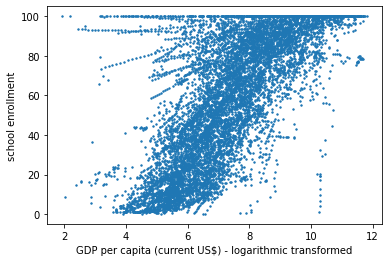

'correlation between GDP and school enrollment: 0.7293453484225308'

In [66]:
calc_correlation(gdp, school_enrollment, "school enrollment", data_log=False)

1.82789359637233 0.101199999451637
0.6031642636640457 0.0


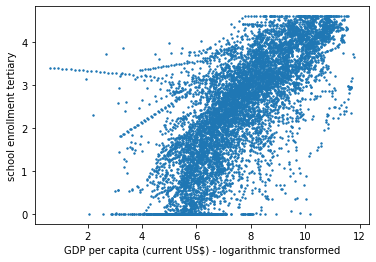

'correlation between GDP and school enrollment tertiary: 0.7476688455453405'

In [73]:
calc_correlation(gdp, school_enrollment_ter, "school enrollment tertiary", data_log=True)

14.098 0.1044075309379426
14.098 0.1044075309379426


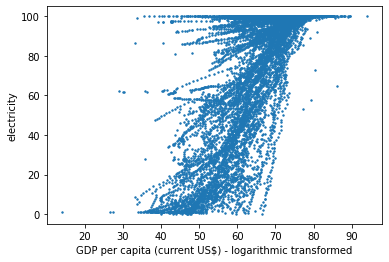

'correlation between GDP and electricity: 0.7649831771324821'

In [77]:
calc_correlation(life_expectancy, electricity, "electricity", disable_gdp_log=True)

12.013 0.1636918332714643
12.013 0.1636918332714643


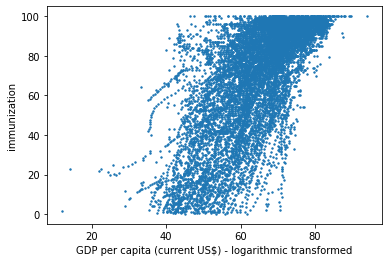

'correlation between GDP and immunization: 0.7137121035022213'

In [78]:
calc_correlation(life_expectancy, immunization, "immunization", disable_gdp_log=True)

In [77]:
from tqdm import tqdm
hp_x = (np.array(x) * 10).astype(int)
hp_y = (np.array(y) * 10).astype(int)

print(np.max(hp_x), np.max(hp_y))

heatmap = list(np.zeros((120, 90)))

print(np.unique(hp_x, return_counts=True))

# for i in tqdm(hp_x):
    # for j in hp_y:
        # heatmap[i][j] += 1

118 88
(array([  9,  11,  15,  18,  19,  20,  21,  23,  25,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118]), array([  1,   1,   1,   1,   1,   1,   1,   1,   2,   1,   2,   3,   4,
         6,   3,   4,  10,   7,  14,   8,  10,  16,  18,  22,  36,  28,
        41,  42,  59,  68,  90,  88, 100, 110, 115, 133, 161, 191, 195,
       193, 178, 182, 177, 192, 171, 180, 184, 221, 243, 214, 191, 192,
       206, 209, 212, 208, 179, 201, 215, 206, 195, 189, 203, 197, 206,
       219, 159, 169, 173, 175, 182, 158, 140, 153, 135, 140, 117, 12

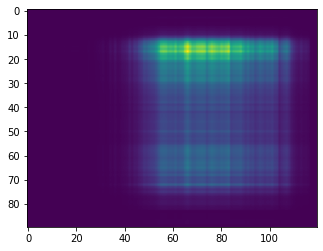

In [70]:
plt.imshow(np.array(heatmap).T)
plt.show()